# **Convolutions, Blurring and Sharpening Images**

1. Convolution Operations
2. Blurring
3. Denoising
4. Sharpening

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

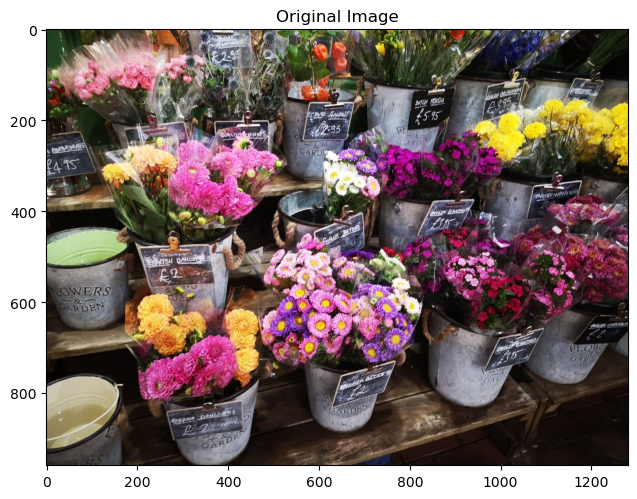

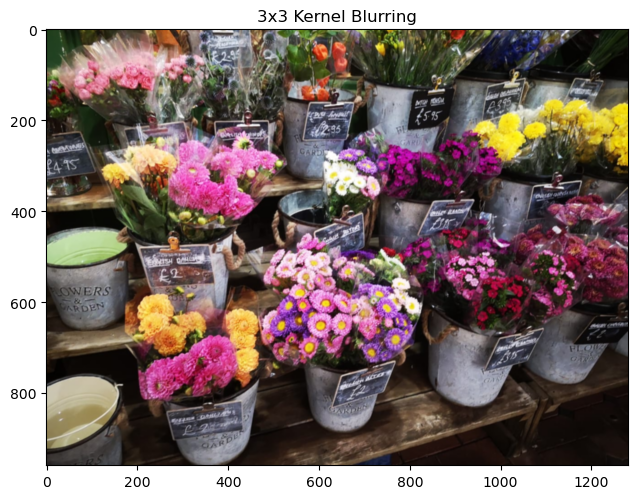

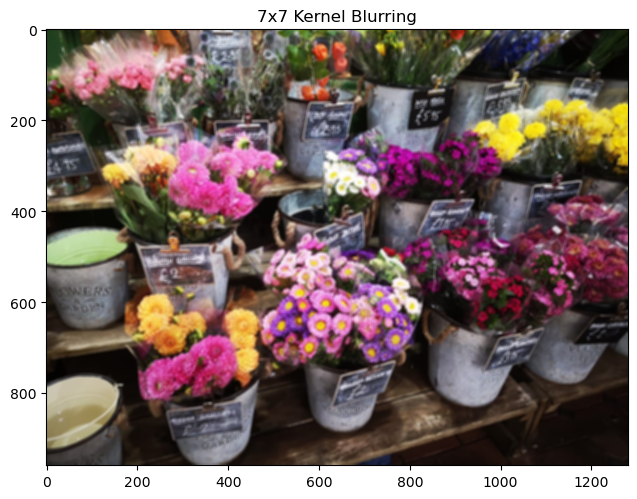

In [2]:
image = cv2.imread('images/flowers.jpeg')
imshow('Original Image', image)

kernel_3x3 = np.ones((3, 3), np.float32) / 9

blurred = cv2.filter2D(image, -1, kernel_3x3)
imshow('3x3 Kernel Blurring', blurred)

kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.filter2D(image, -1, kernel_7x7)
imshow('7x7 Kernel Blurring', blurred2)

### **Other commonly used blurring methods in OpenCV**
- Regular Blurring
- Gaussian Blurring
- Median Blurring

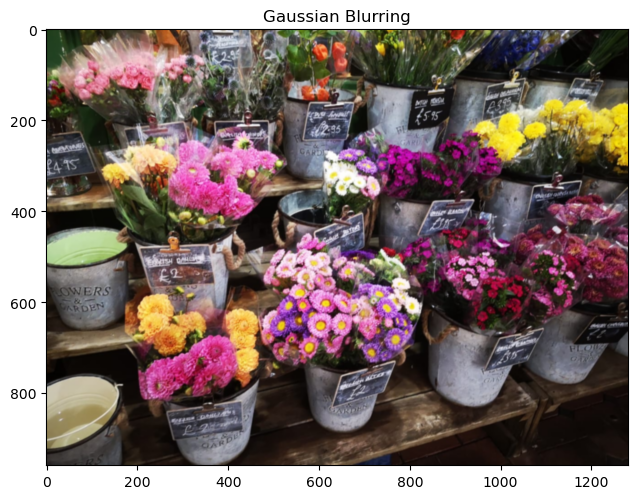

In [3]:
# Averaging done by convolving the image with a normalized box filter. 
# This takes the pixels under the box and replaces the central element
# Box size needs to odd and positive 
blur = cv2.blur(image, (5,5))
imshow('Averaging', blur)

# Instead of box filter, gaussian kernel
Gaussian = cv2.GaussianBlur(image, (5,5), 0)
imshow('Gaussian Blurring', Gaussian)

# Takes median of all the pixels under kernel area and central 
# element is replaced with this median value
median = cv2.medianBlur(image, 5)
imshow('Median Blurring', median)

cv2.bilateralFilter, OpenCV kütüphanesinde bulunan bir işlevdir ve görüntü işleme alanında kullanılır. Bu işlev, bir görüntü üzerinde bilateral filtreleme yöntemini uygulamak için kullanılır. Bilateral filtreleme, gürültüyü azaltırken kenarları korumak amacıyla kullanılan bir filtreleme tekniğidir. Bu işlem sırasında hem uzak piksellerin değeri hem de benzer piksellerin değeri göz önünde bulundurulur.

Bir görüntüyü bilateral filtrelemek, her pikselin değerinin çevresindeki piksellerin değerlerine dayalı olarak düzeltilmesini içerir. Ancak sadece yakın pikseller değil, aynı zamanda benzer renk değerlerine sahip pikseller de dikkate alınır. Bu sayede kenarlar korunurken gürültü azaltılır.

cv2.bilateralFilter işlevinin temel sözdizimi şu şekildedir:

-dst = cv2.bilateralFilter(src, d, sigma_color, sigma_space)


src: İşlem yapılacak girdi görüntü.
d: Filtre boyutu. Daha büyük bir değer, daha fazla uzak pikselin etkileşime girdiği anlamına gelir. Ancak bu, işlemin daha yavaş çalışmasına neden olabilir.
sigma_color: Renk benzerliği için bir eşik değeri. Daha büyük bir değer, daha fazla renk benzerliğinin kabul edildiği anlamına gelir.
sigma_space: Uzamsal benzerlik için bir eşik değeri. Daha büyük bir değer, daha fazla uzamsal benzerliğin kabul edildiği anlamına gelir.
Bu işlevi kullanarak, görüntü üzerindeki gürültüyü azaltabilirken kenarları koruyabilirsiniz. Fakat parametrelerin seçimi, sonuç üzerindeki etkiyi belirlemek için deneme yanılma gerektirebilir.

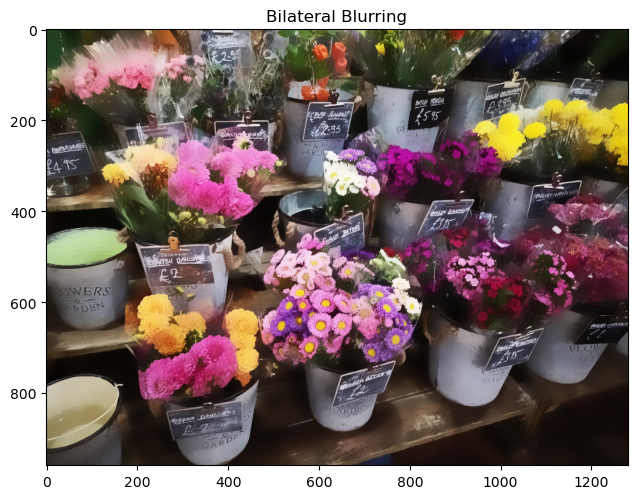

In [9]:
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
imshow('Bilateral Blurring', bilateral)

cv2.fastNlMeansDenoisingColored, OpenCV kütüphanesinde bulunan bir görüntü gürültü azaltma işlevidir. Bu işlev, Non-Local Means (NLM) denilen bir algoritmayı temel alır ve renkli görüntülerdeki gürültüyü azaltmak için kullanılır. Bu yöntem, gürültüyü azaltırken görüntüdeki kenarları koruma yeteneği ile bilinir.

Temel olarak, bu yöntem benzer pikseller arasındaki benzerlikleri kullanarak gürültüyü ortadan kaldırır. Her piksel, benzer renkli bölgelerdeki diğer piksellerin değerleri kullanılarak düzeltilir. Bu, pikselin gürültülü olduğu düşünülen değerine daha yakın olan benzer renklere sahip piksellerin ağırlıklı ortalamasını alarak gerçekleştirilir.

cv2.fastNlMeansDenoisingColored işlevinin temel sözdizimi şu şekildedir:

dst = cv2.fastNlMeansDenoisingColored(src, None, h, hForColorComponents, templateWindowSize, searchWindowSize)

src: İşlem yapılacak girdi renkli görüntü.
None: Gürültü azaltılmış görüntünün hedefi. Bu parametreyi None olarak bırakarak işlev gürültü azaltılmış görüntüyü döndürür.
h: Piksel değerlerinin benzerliğini kontrol eden parametre. Daha büyük bir değer, daha fazla benzerliğin kabul edildiği anlamına gelir.
hForColorComponents: Renk bileşenleri için h parametresi. Genellikle h ile aynı değer atanır.
templateWindowSize: Piksel benzerliği hesaplanırken kullanılan pencere boyutu. Daha büyük bir değer, daha geniş bir alanın göz önünde bulundurulduğu anlamına gelir.
searchWindowSize: Benzer pikselleri ararken kullanılan pencere boyutu. Bu pencere boyutu da büyükse, daha geniş bir alanda arama yapılır.
Bu işlevi kullanarak renkli görüntülerdeki gürültüyü etkili bir şekilde azaltabilirsiniz. Ancak parametrelerin ayarlanması, istenen sonucu elde etmek için deneme yanılma gerektirebilir.


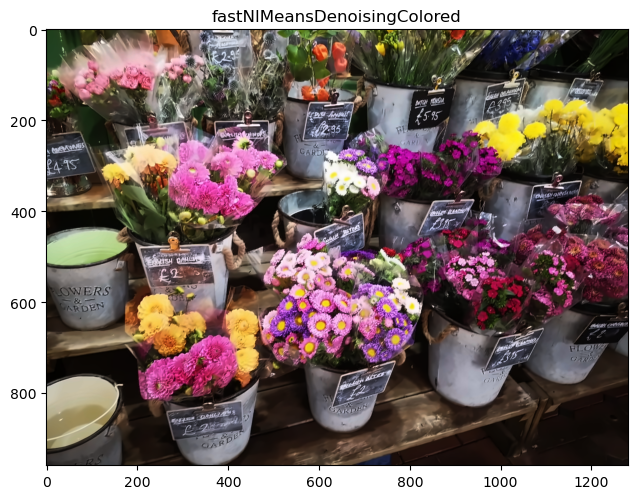

In [13]:
imshow('Original', image)

dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)
imshow('fastNlMeansDenoisingColored', dst)

# Sharpening Images

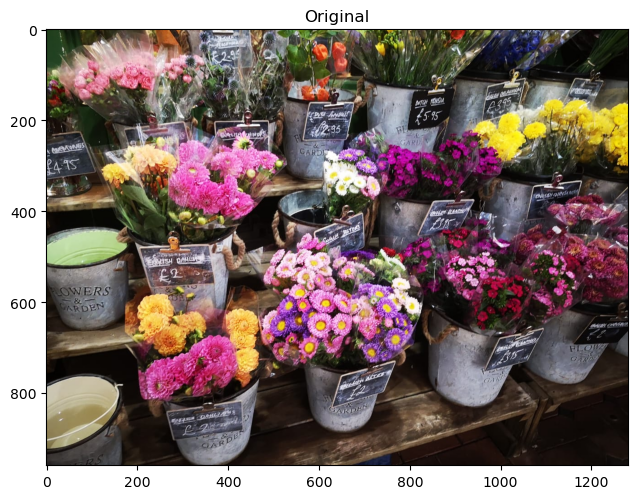

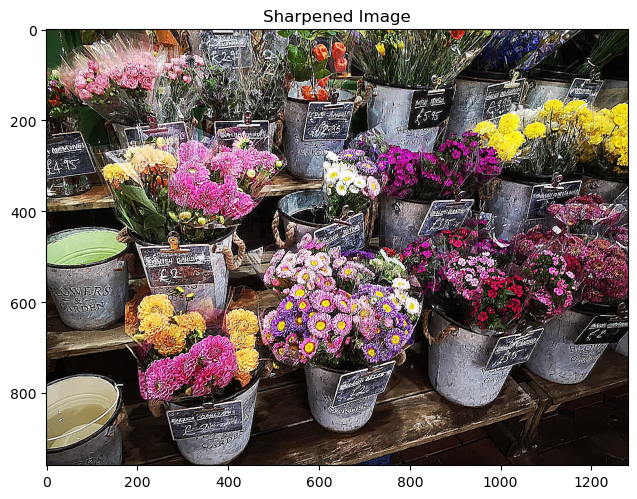

In [15]:
imshow('Original', image)

# Create our shapening kernel, remember it must sum to one 
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])

# applying the sharpening kernel to the image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
imshow('Sharpened Image', sharpened)